### 피마 인디언 당뇨병 예측

### https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

- 당뇨병 여부를 판단.
- 피마 인디언 당뇨병 데이터 셋트는 북아메리카 피마 지역 원주민의  Type-2 당뇨병 결과 데이터. 

- 보통 당뇨 원인으로 식습관과 유전을 꼽습니다.

- 피마 지역은 고립된 지역에서 인디언 고유의 혈통이 지속돼 왔지만, 20세기 후반에 들어서면서 서구화된 식습관으로 당뇨 환자가 생김.

 - Pregnancies : 임신 횟수 -> Number of times pregnant 
 - Glucose : 포도당 부하 검사 수치 -> Plasma glucose concentration a 2 hours in an oral glucose tolerance test
 - bloodPressure : 혈압(mm Hg) -> Diastolic blood pressure (mm Hg)
 - SkinThickness : 팔 삼두근 뒤쪽의 피하지방 측정값(mm) ->Triceps skin fold thickness (mm)
 - Insulin : 2시간 혈청 인슐린(mu U/ml) ->2-Hour serum insulin (mu U/ml)
 - BMI : 체질량 지수( 체중(kg) / (키(m)^2)) -> Body mass index (weight in kg/(height in m)^2)
 - DiabetesPedigressFunction : 당뇨병 혈통 기능. ->Diabetes pedigree function
 - Age : 나이 ->age(years)
 - Outcome : class 결정 값 (0 또는 1) -> Class variable (0 or 1) 268 of 768 are 1, the others are 0

- 피마 인디언
  - https://inews.ewha.ac.kr/news/articleView.html?idxno=15150 이대학보

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('C:/Users/405/my_study/Python_Study/0518/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.shape

(768, 9)

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [9]:
type(df)

pandas.core.frame.DataFrame

In [10]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
corr=df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

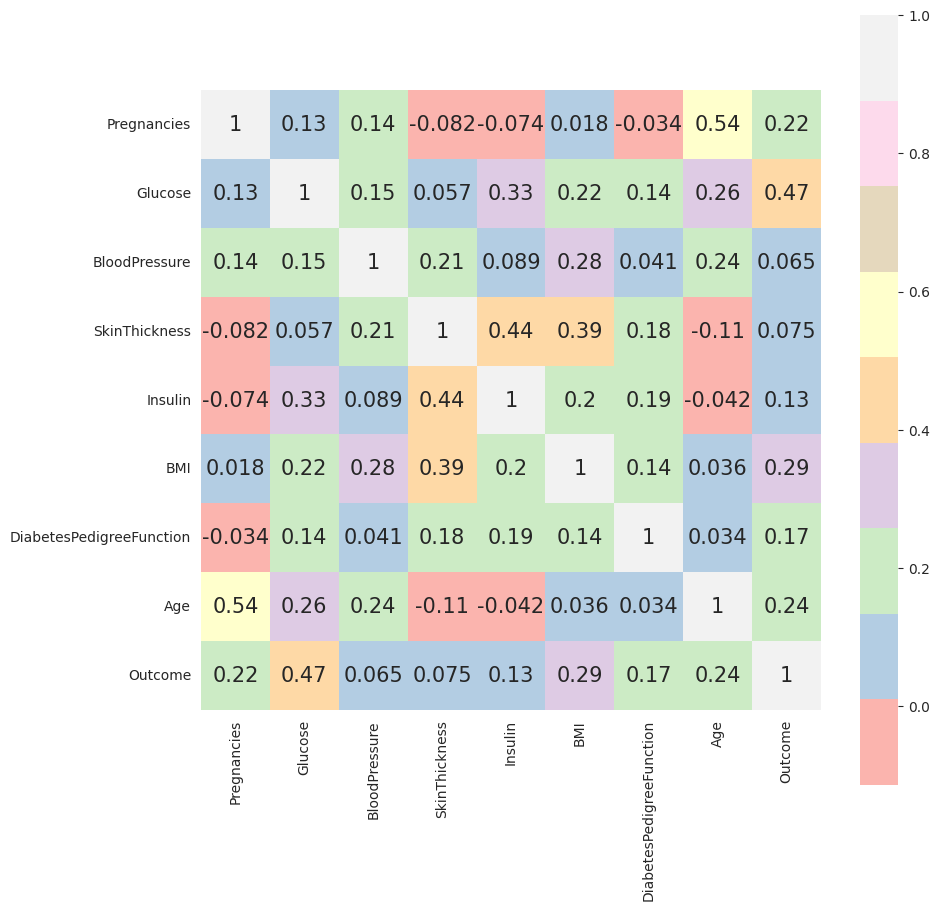

In [58]:
plt.figure(figsize=(10,10)) # 히트맵그리기
sns.heatmap(corr, cbar=True, square= True,annot=True, annot_kws={'size':15}, cmap='Pastel1')
# 컬러바표시, 정사각형 히트맵, 히트맵의상관관계값

In [ ]:
sns.regplot(x='Pregnancies',y='Outcome',data=df,scatter_kws={"fc":"r", "ec":"r"})

<Axes: xlabel='Glucose', ylabel='Outcome'>

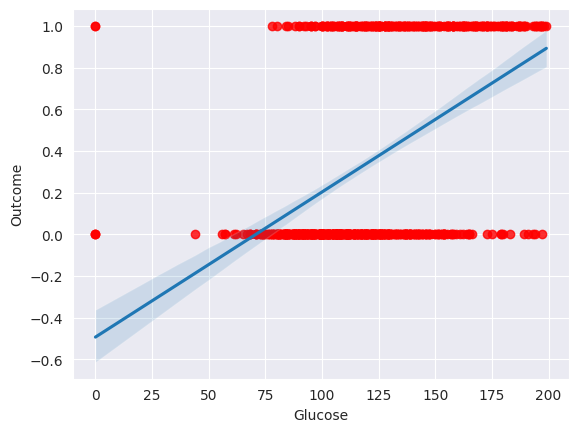

In [55]:
sns.regplot(x='Glucose',y='Outcome',data=df, scatter_kws={"fc":"r", "ec":"r"})

In [ ]:
sns.regplot(x='BloodPressure',y='Outcome',data=df, scatter_kws={"fc":"r", "ec":"r"})

In [ ]:
sns.regplot(x='SkinThickness',y='Outcome',data=df, scatter_kws={"fc":"r", "ec":"r"})

In [ ]:
sns.regplot(x='Insulin',y='Outcome', data=df, scatter_kws={"fc":"r", "ec":"r"})

In [ ]:
sns.regplot(x='BMI',y='Outcome', data=df, scatter_kws={"fc":"r", "ec":"r"})

In [ ]:
sns.regplot(x='DiabetesPedigreeFunction',y='Outcome', data=df, scatter_kws={"fc":"r", "ec":"r"})

In [ ]:
sns.regplot(x='Age',y='Outcome', data=df, scatter_kws={"fc":"r", "ec":"r"})

In [ ]:
sns.set_style("darkgrid")

sns.lmplot(
	x="SkinThickness", 
    y = "BMI",
    data= df, 
    height = 7, 
    ci = None,
    order = 1, 
    hue="Outcome",
    robust=False,
    scatter_kws = {"s":70}
    ) 

plt.show()

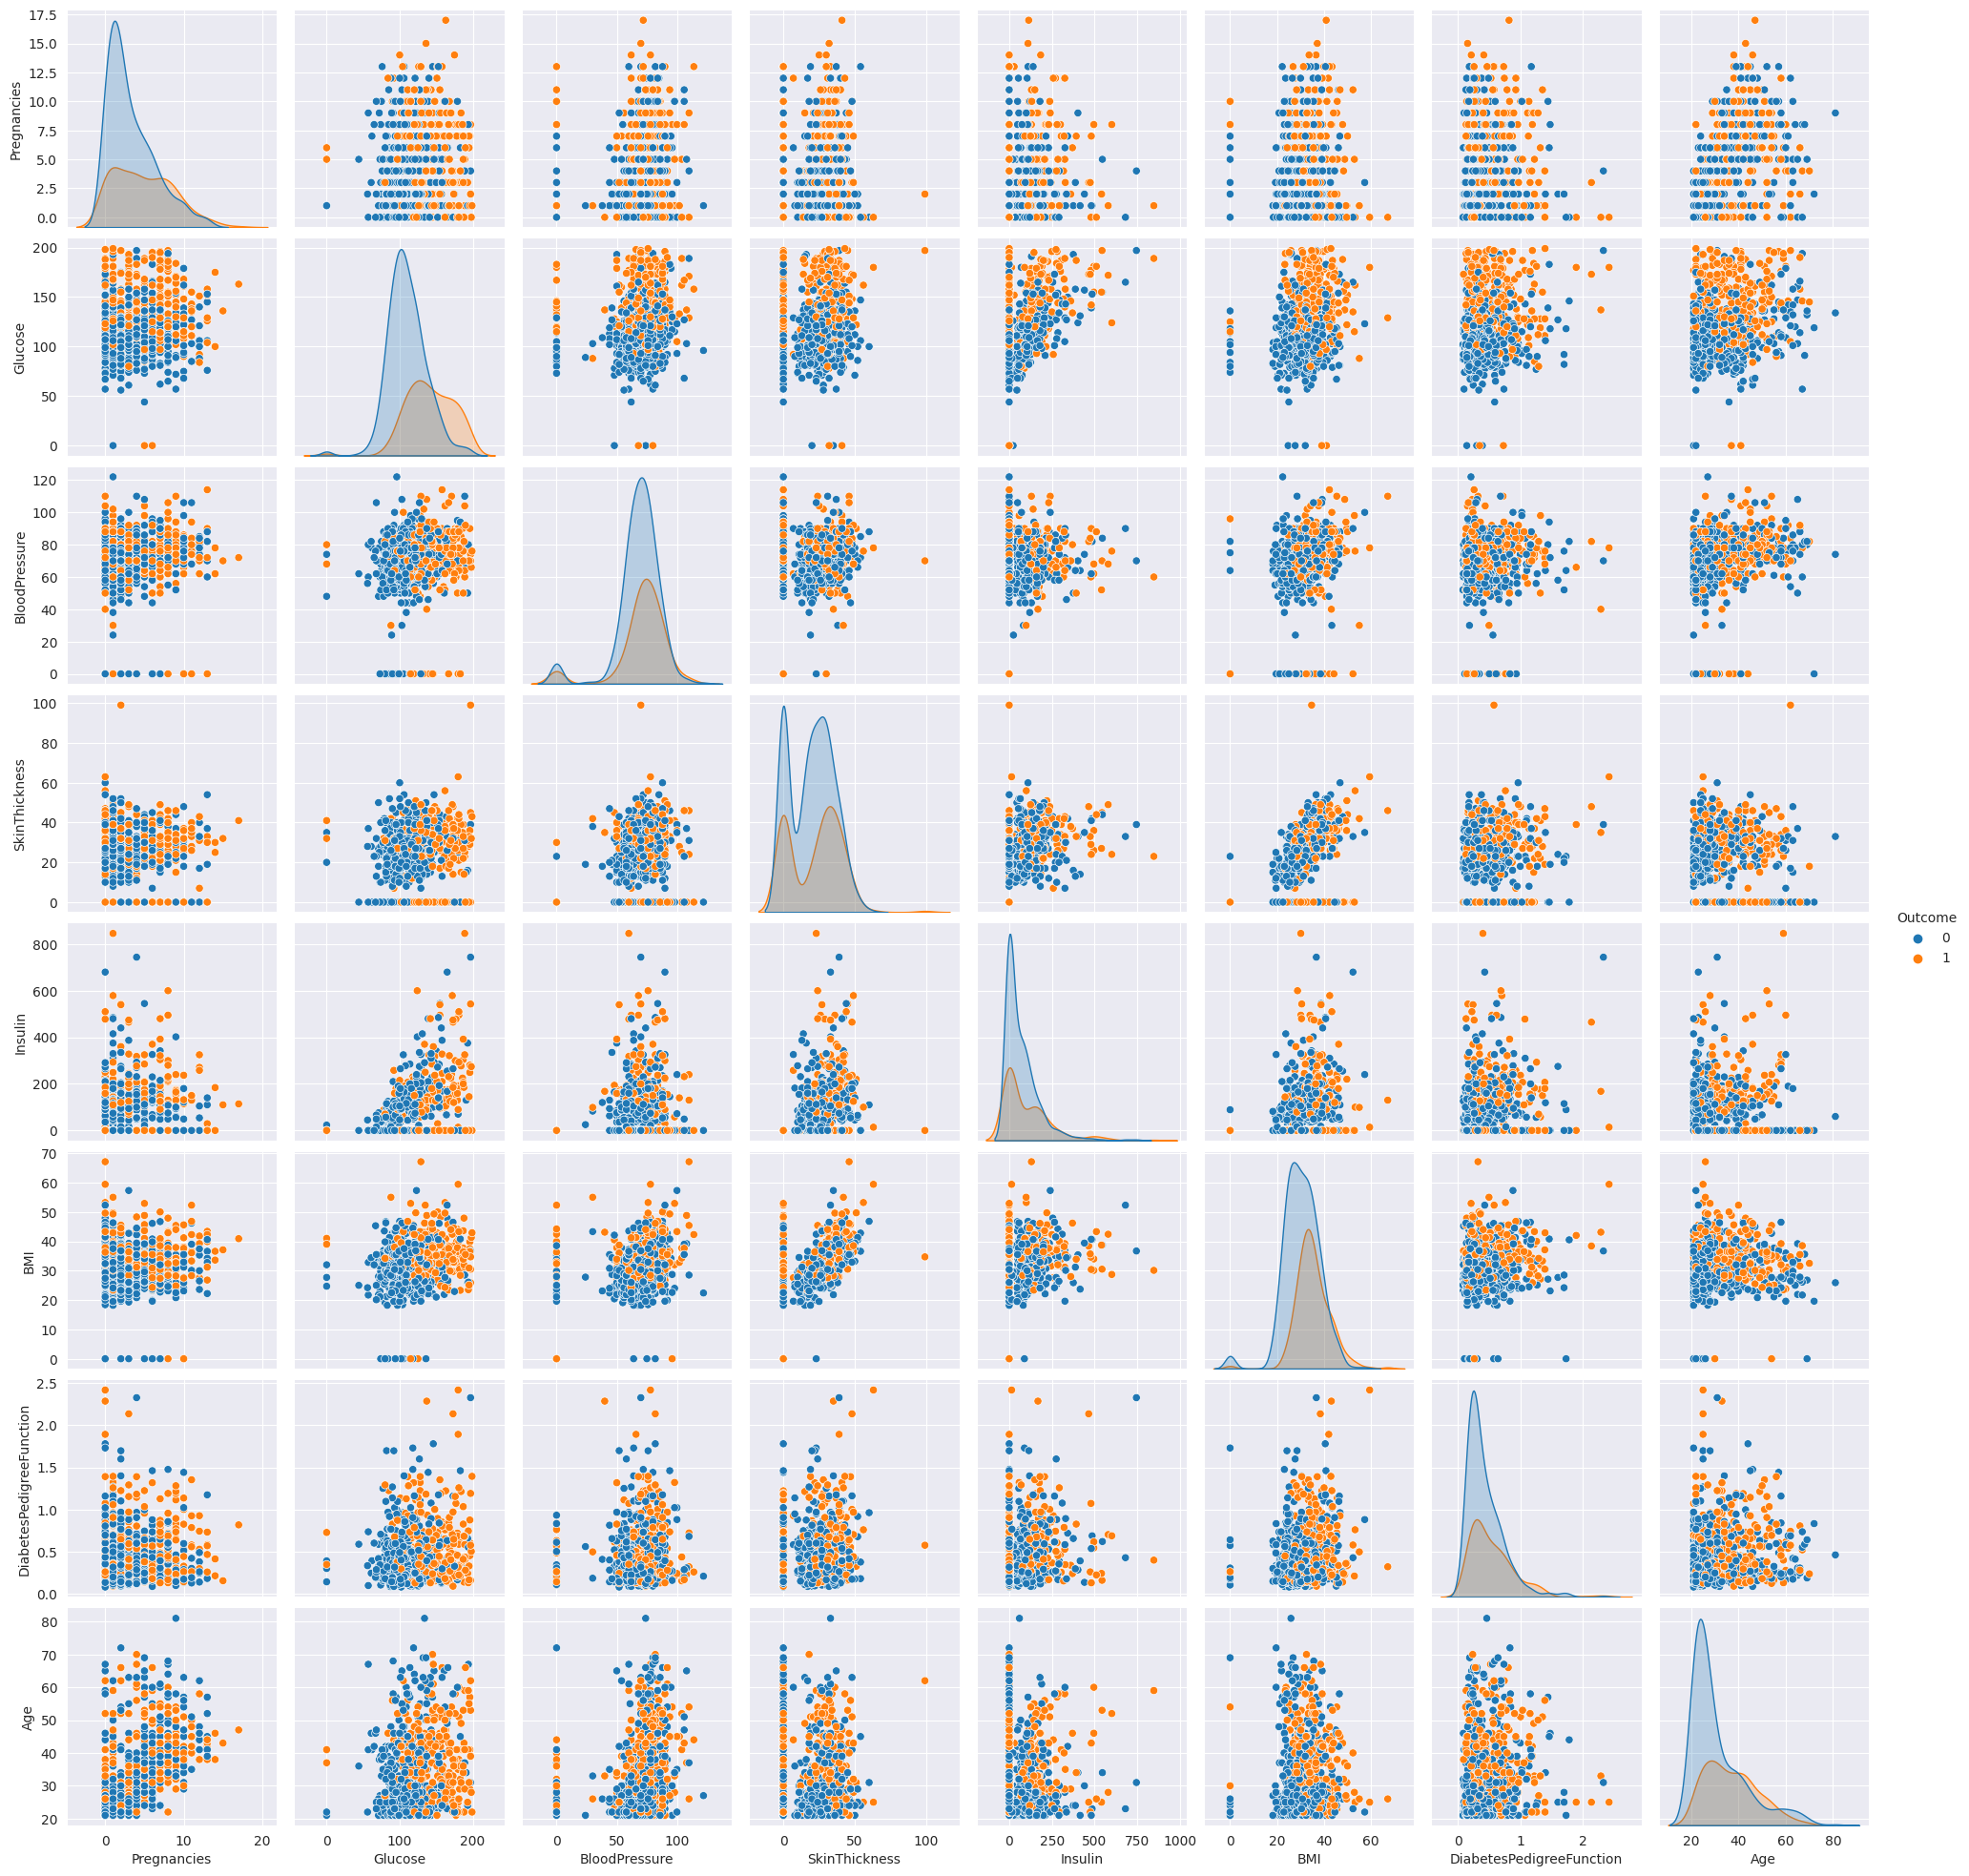

In [52]:
sns.pairplot(
	df,
    hue ="Outcome" 
    )
plt.show()

In [4]:
df_data=df.drop('Outcome',axis=1)
df_target=df['Outcome']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_data,
                                                    df_target,
                                                    test_size = 0.2,
                                                    random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape,y_test.shape)

(614, 8) (154, 8)
(614,) (154,)


In [13]:
from sklearn.preprocessing import MinMaxScaler # 정규화 (0~1사이의 값으로 바꿔 데이터 분석하기 쉽게만듬)
scaler=MinMaxScaler()

scaler.fit(X_train)
X_scaled_train=scaler.transform(X_train) # 트레인, 테스트에 사용
# X_scaled_Train=scaler.fit_transform(X_train)-> 트레인에만 사용

pd.DataFrame(X_scaled_train).describe()

,0,1,2,3,4,5,6,7
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.220157,0.607312,0.568978,0.323794,0.096263,0.476653,0.167023,0.198453
std,0.194898,0.160980,0.151743,0.244984,0.137393,0.115360,0.143829,0.191724
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.502513,0.524590,0.000000,0.000000,0.403875,0.069812,0.050000
50%,0.176471,0.587940,0.590164,0.365079,0.050236,0.476900,0.125747,0.133333
75%,0.352941,0.698492,0.655738,0.507937,0.153369,0.542101,0.228757,0.316667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
X_scaled_test=scaler.transform(X_test)
pd.DataFrame(X_scaled_test).describe()

,0,1,2,3,4,5,6,7
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,0.250191,0.608301,0.556313,0.334673,0.086603,0.477336,0.172790,0.226190
std,0.209847,0.159929,0.183853,0.284356,0.131601,0.126061,0.132005,0.211419
min,0.000000,0.311558,0.000000,0.000000,0.000000,0.000000,0.010248,0.000000
25%,0.073529,0.482412,0.508197,0.000000,0.000000,0.420641,0.072267,0.050000
50%,0.176471,0.562814,0.590164,0.412698,0.000000,0.489568,0.125747,0.141667
75%,0.411765,0.733668,0.639344,0.523810,0.148641,0.551043,0.256725,0.350000
max,0.764706,0.989950,0.934426,1.571429,0.684397,0.792846,0.560205,0.766667
